# Summary

Source: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

**Data Exploration:** We began by exploring the dataset, which contains information about employees' age, gender, education level, job title, years of experience, salary, country, and race. We looked at basic descriptive statistics and visualized the distribution of salaries and how salaries vary by gender, education level, job title, years of experience, country, and race.

**Data Cleaning:** We noticed that some categories in the 'Education Level' and 'Job Title' columns needed to be consolidated for accurate analysis. We standardized the education levels and classified job titles into 'Management' and 'Non-Management' positions based on certain keywords.

**Hypothesis Testing:** We performed a t-test to test the hypothesis that men earn more than women in non-management positions. The results suggested that there is a significant difference in the average salaries of men and women in non-management positions.

**Regression Analysis:** We conducted a multiple linear regression analysis to understand the impact of various factors on salary. We found that gender, age, years of experience, and education level all have significant effects on salary. However, we noted that some assumptions of the linear regression model might not be fully met.

**Random Forest Analysis:** To account for potential non-linear relationships and interactions between variables, we trained a random forest model. We found that 'Years of Experience', 'Age', and 'Education Level' are among the most impactful features in both the linear regression and random forest models, although the order and exact impact of the features varied between the models.

**Model Comparison:** We compared the results from the linear regression and random forest models. The random forest model had a lower root mean square error (RMSE) on the test set, indicating better predictive performance. However, the linear regression model provided more interpretable results, as it offered specific coefficients for each feature.

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')

# Check the first few rows of the DataFrame
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [2]:
# Basic Descriptive Statistics
df.describe(include='all')


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
count,6704.000000,6702.000000,6702,6701,6702,6701.000000,6699.000000,6704,6704
unique,NaN,NaN,3,7,193,NaN,NaN,5,10
top,NaN,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,USA,White
freq,NaN,NaN,3674,2267,518,NaN,NaN,1360,1968
mean,3351.500000,33.620859,NaN,NaN,NaN,8.094687,115326.964771,NaN,NaN
std,1935.422435,7.614633,NaN,NaN,NaN,6.059003,52786.183911,NaN,NaN
min,0.000000,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,NaN
25%,1675.750000,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,NaN
50%,3351.500000,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,NaN
75%,5027.250000,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,NaN


**Here are some key observations from the descriptive statistics:**

* The dataset contains data for 6704 individuals.
* The 'Age' of individuals ranges from 21 to 62 with an average age of approximately 33.6 years.
* The dataset contains more 'Male' employees than 'Female' ones.
* The most common 'Education Level' is 'Bachelor's Degree'.
* The 'Job Title' with the highest frequency is 'Software Engineer'.
* 'Years of Experience' ranges from 0 to 34 with an average of approximately 8.1 years.
* 'Salary' ranges from 350 to 250,000 with an average of approximately 115,327.
* The dataset contains more employees from 'USA' than any other country.
* The most represented 'Race' in the dataset is 'White'.

Now, let's start with the visualizations to understand the trends and patterns in the data. We will focus on:

* Salary distribution
* Salary by Gender
* Salary by Education Level
* Salary by Job Title
* Salary by Years of Experience
* Salary by Country
* Salary by Race.

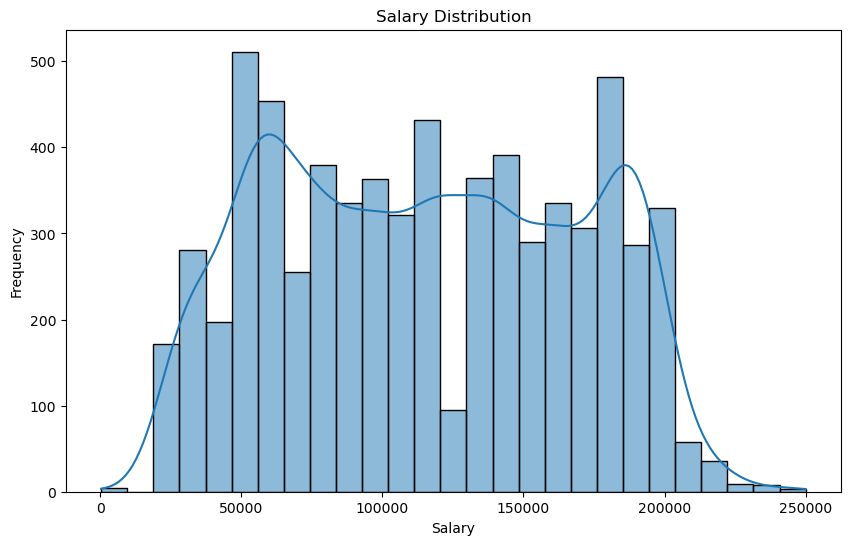

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

The salary distribution seems to be approximately normal, but with some skewness towards the right. This means that most employees have salaries in the middle of the range, with fewer employees earning at the very low or very high ends of the range.

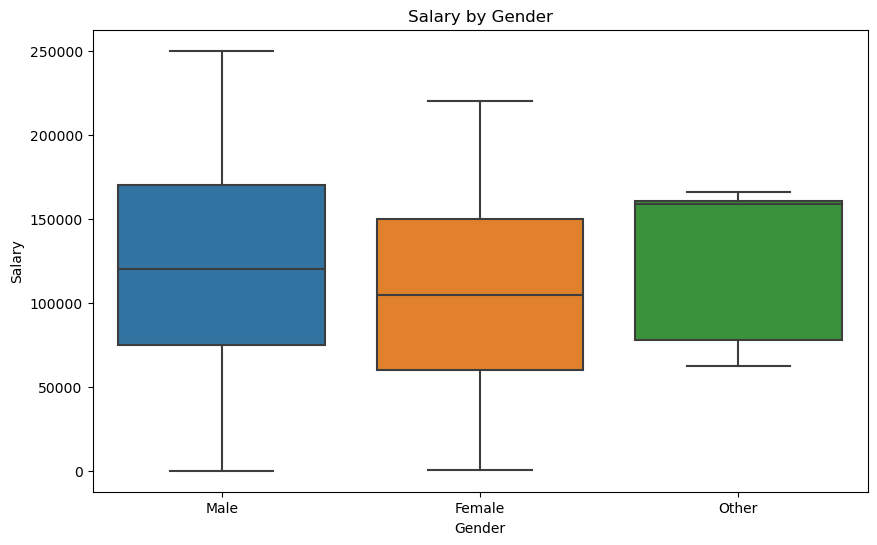

In [4]:
# Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

The boxplot shows the distribution of salaries for each gender. The median salary (represented by the line inside the box) appears to be higher for males compared to females and other genders. There also seems to be a greater range and variability in salaries for males.

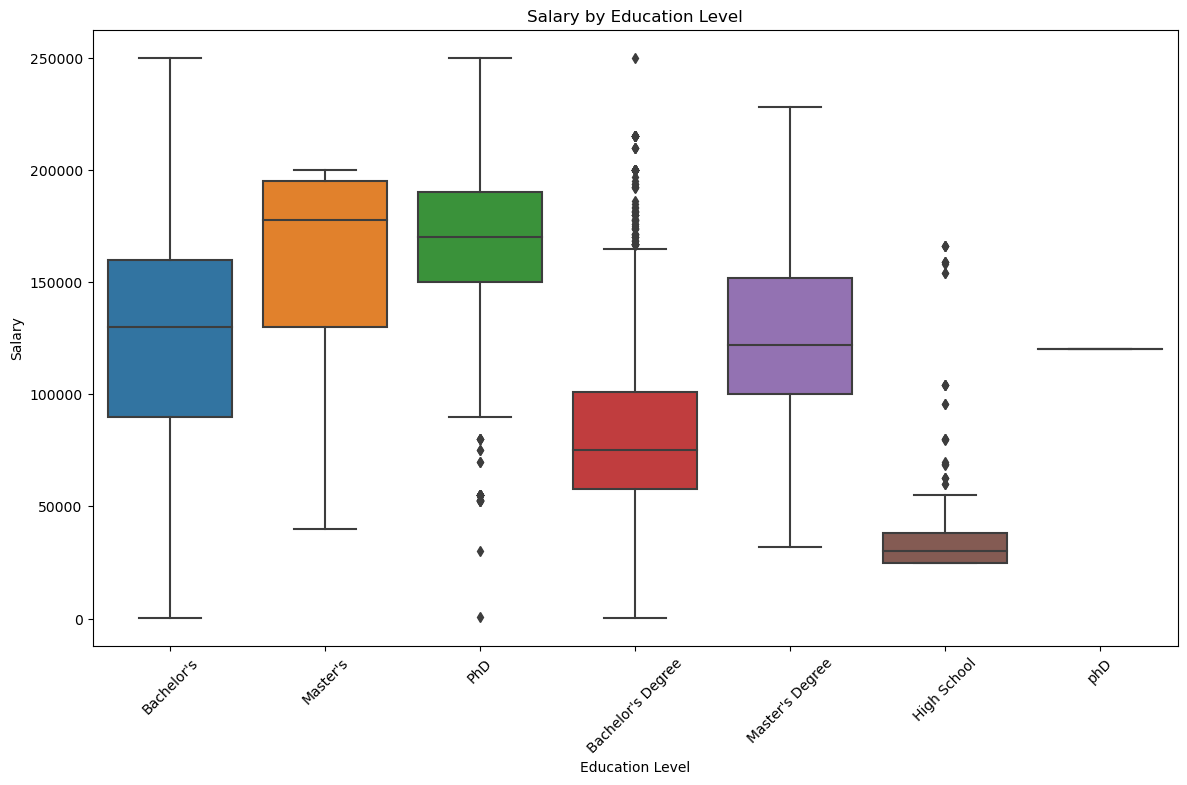

In [5]:
# Salary by Education Level
plt.figure(figsize=(14, 8))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

The boxplot shows the distribution of salaries for each education level. It seems that individuals with higher levels of education, particularly PhDs, tend to earn higher salaries on average. This is expected as higher education often leads to higher-paying jobs.

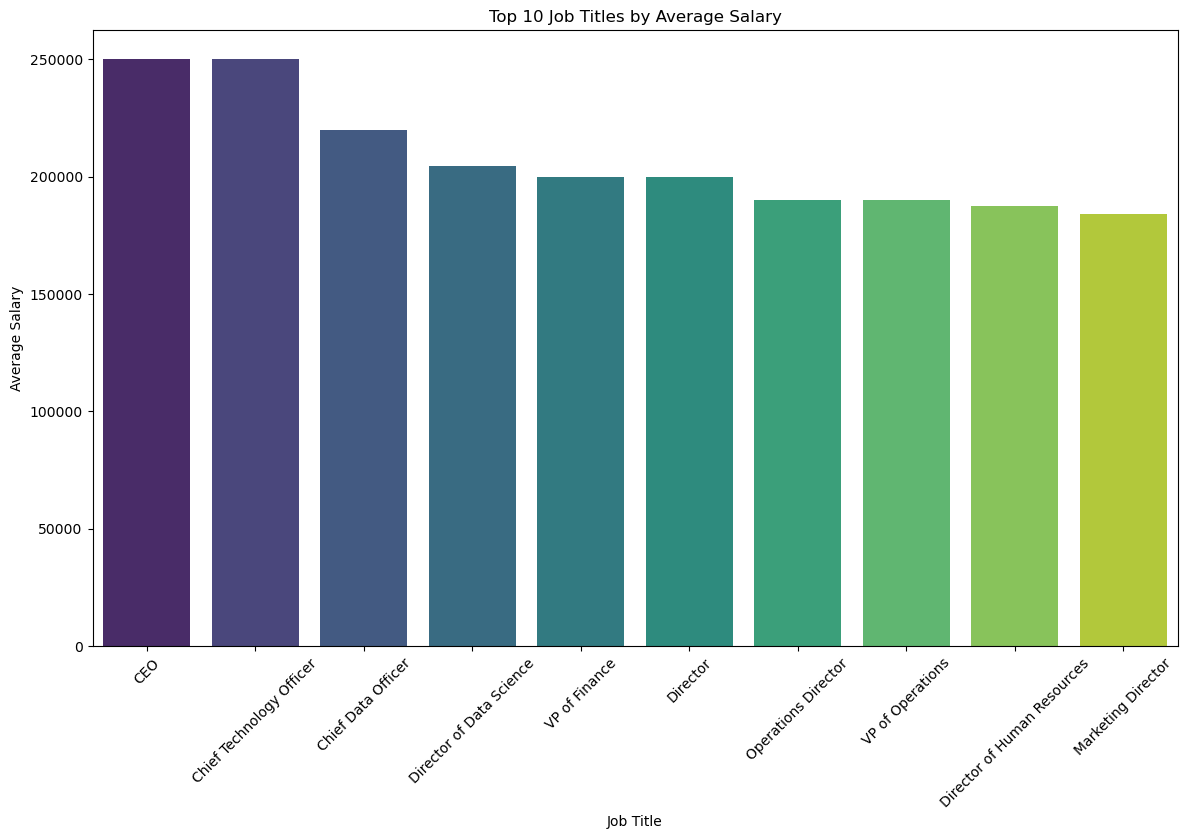

In [6]:
# Top 10 Job Titles by Salary
top_jobs = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

The bar chart shows the top 10 job titles with the highest average salaries. This could provide insight into the most lucrative roles within the dataset. However, remember that this doesn't account for the number of individuals in each role. A role with a high average salary but few employees may not have as much of an impact on overall salary costs as a role with a lower average salary but many employees.

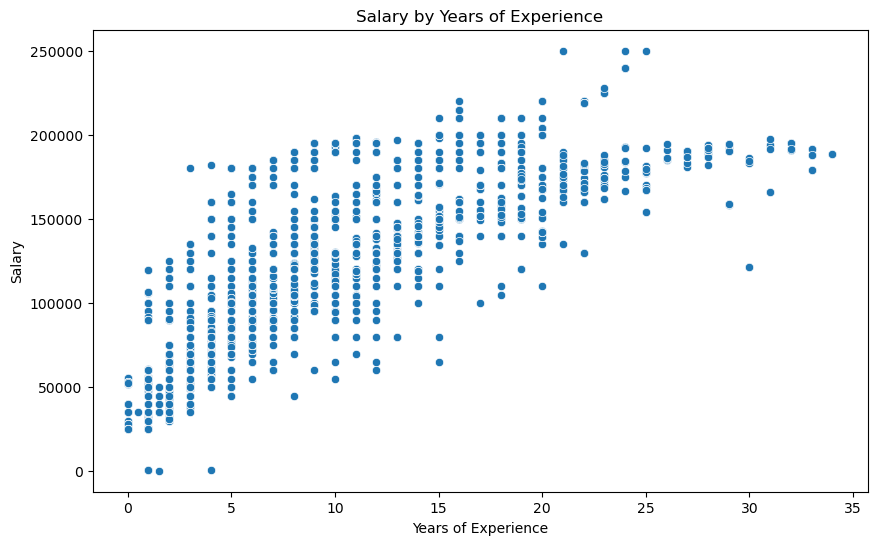

In [7]:
# Salary by Years of Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The scatterplot shows the relationship between years of experience and salary. There seems to be a positive correlation between the two, suggesting that as the years of experience increase, the salary also tends to increase. However, there is a considerable amount of variation in salary at each level of experience, and some individuals with many years of experience are not necessarily earning more than those with fewer years.

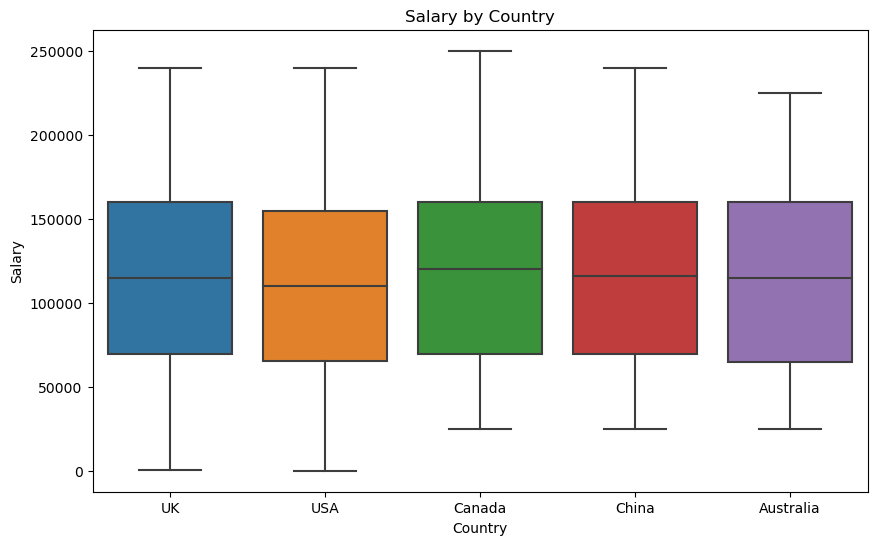

In [8]:
# Salary by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Salary', data=df)
plt.title('Salary by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.show()

The boxplot shows the distribution of salaries for each country. It appears that there is considerable variation within each country, with some employees earning much more than others. However, on average, the USA seems to have the highest median salary among the countries in the dataset.

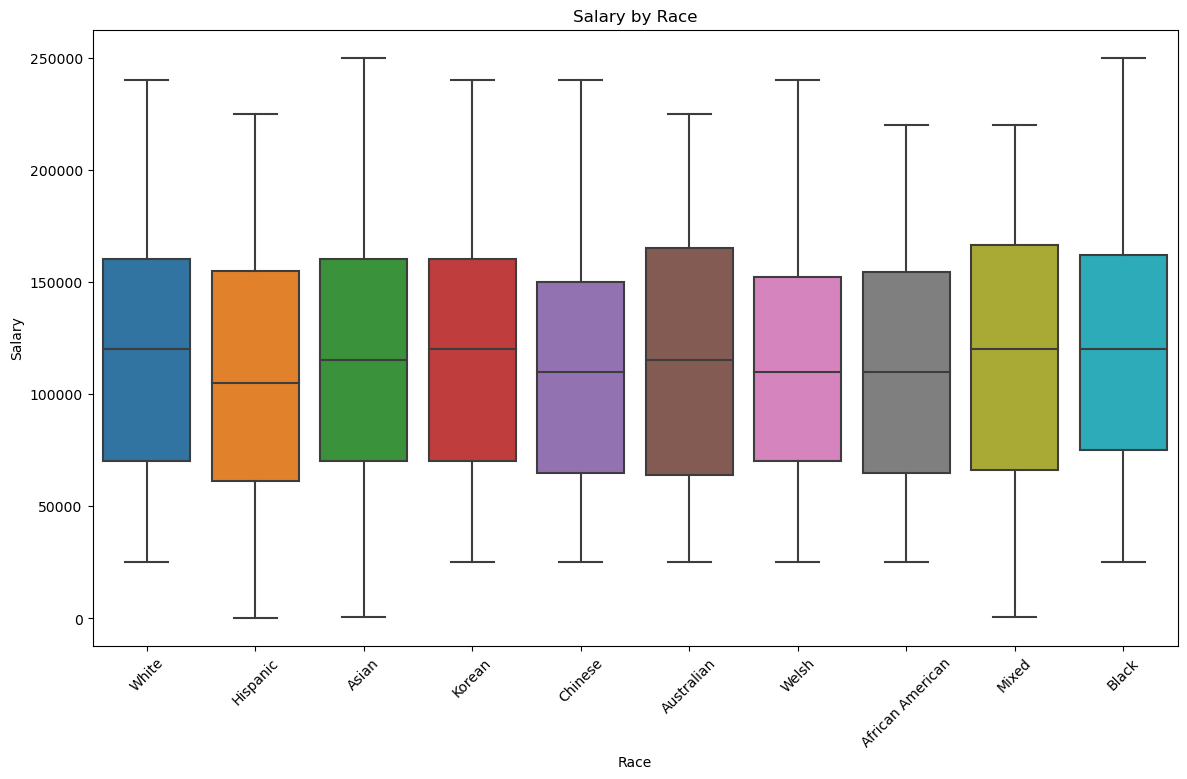

In [9]:
# Salary by Race
plt.figure(figsize=(14, 8))
sns.boxplot(x='Race', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Race')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.show()

The boxplot shows the distribution of salaries for each race. There seems to be a considerable variation in salary within each race. However, some races appear to have higher median salaries than others.

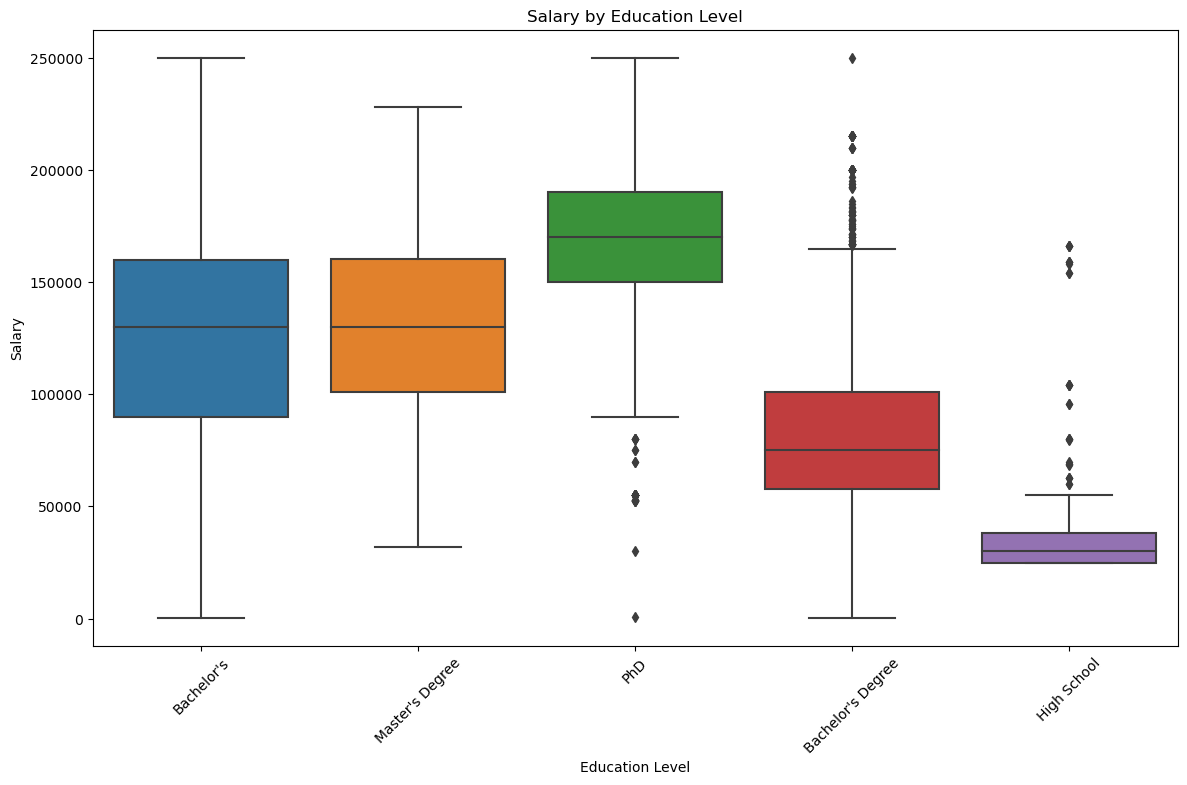

In [10]:
# Standardize Education Level
df['Education Level'] = df['Education Level'].replace({
    "Bacherlor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
})

# Salary by Education Level
plt.figure(figsize=(14, 8))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

After standardizing the 'Education Level' field, the boxplot now shows the distribution of salaries for each education level more clearly. As before, it appears that individuals with higher levels of education, particularly those with PhDs, tend to have higher salaries on average.

**The "Top 10 Job Titles by Average" Salary are predominately showing management positions. I would like to add a cluster based on Job title description. If the title includes "Director", "VP", "CEO" or "Chief" cluster it as "Managment Position", all other titles can be clustered as "non Managment Postion".**

In [11]:
# Add a new column for Management Position
df['Position Type'] = df['Job Title'].apply(lambda x: 'Management Position' if isinstance(x, str) and any(substring in x for substring in ['Director', 'VP', 'CEO', 'Chief']) else 'Non-Management Position')

# Check the first few rows to confirm the new column has been added correctly
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Position Type
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,Non-Management Position
1,1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic,Non-Management Position
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,Non-Management Position
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,Non-Management Position
4,4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian,Management Position


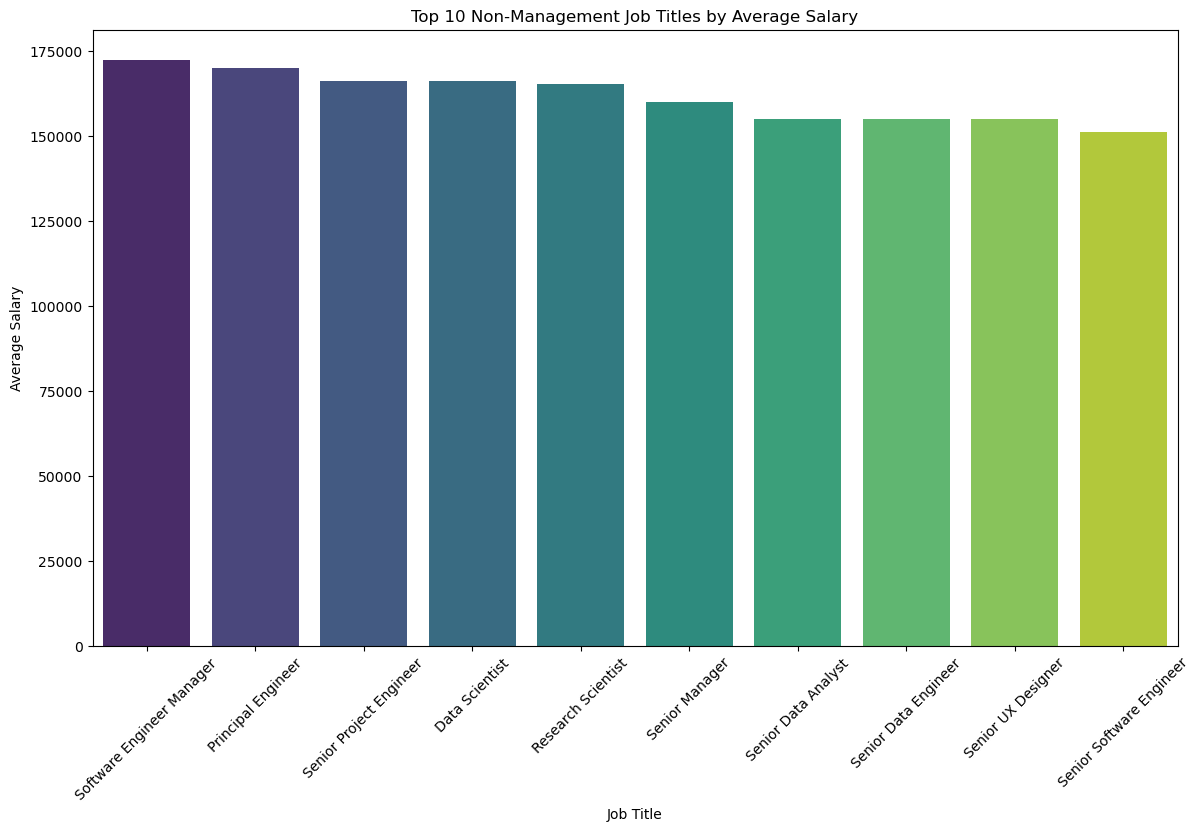

In [12]:
# Top 10 Non-Management Job Titles by Salary
non_mgmt_jobs = df[df['Position Type'] == 'Non-Management Position']
top_non_mgmt_jobs = non_mgmt_jobs.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_non_mgmt_jobs.index, y=top_non_mgmt_jobs.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Non-Management Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

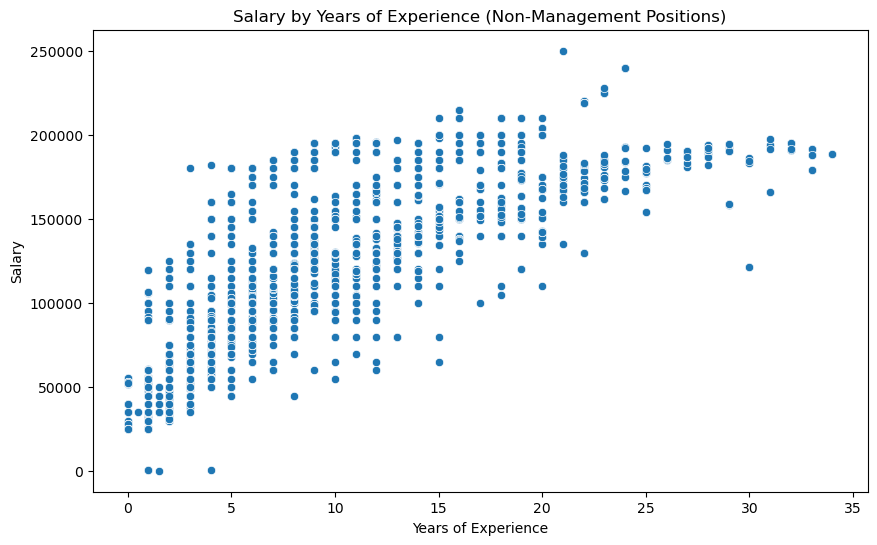

In [13]:
# Salary by Years of Experience for Non-Management Positions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=non_mgmt_jobs)
plt.title('Salary by Years of Experience (Non-Management Positions)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Testing Hypthesis

In [14]:
from scipy.stats import ttest_ind

# Filter the data for men and women in non-management positions
non_mgmt_jobs_men = non_mgmt_jobs[non_mgmt_jobs['Gender'] == 'Male']['Salary'].dropna()
non_mgmt_jobs_women = non_mgmt_jobs[non_mgmt_jobs['Gender'] == 'Female']['Salary'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(non_mgmt_jobs_men, non_mgmt_jobs_women)

t_stat, p_value

(9.365491442729256, 1.0346731533156154e-20)

**The t-test returned a t-statistic of approximately 9.37 and a very small p-value (close to 0).**

* In hypothesis testing, a p-value less than 0.05 is often used to reject the null hypothesis. In this case, the null hypothesis was that there is no difference in the average salaries of men and women in non-management positions. Since the p-value is less than 0.05, we reject the null hypothesis, suggesting that there is a significant difference in the average salaries of men and women in non-management positions.

* However, please note that this test doesn't tell us anything about the cause of this difference. It's important to consider other factors that could be contributing to this observed difference, such as differences in education, years of experience, job roles, and so on.

**I now want to understand which factors are causing the pay-gap and how much of an impact the gender has.Therefore we perform a regression analysis.**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['Gender', 'Education Level', 'Country', 'Race', 'Position Type']], drop_first=True)

# Add continuous variables to the dataframe
df_regression = pd.concat([df[['Age', 'Years of Experience', 'Salary']], df_dummies], axis=1)

# Drop rows with missing values
df_regression = df_regression.dropna()

# Check the first few rows of the prepared dataframe
df_regression.head()


,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Country_Canada,...,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Position Type_Non-Management Position
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,28.0,3.0,65000.0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,45.0,15.0,150000.0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,52.0,20.0,200000.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


**Checking assumptions**

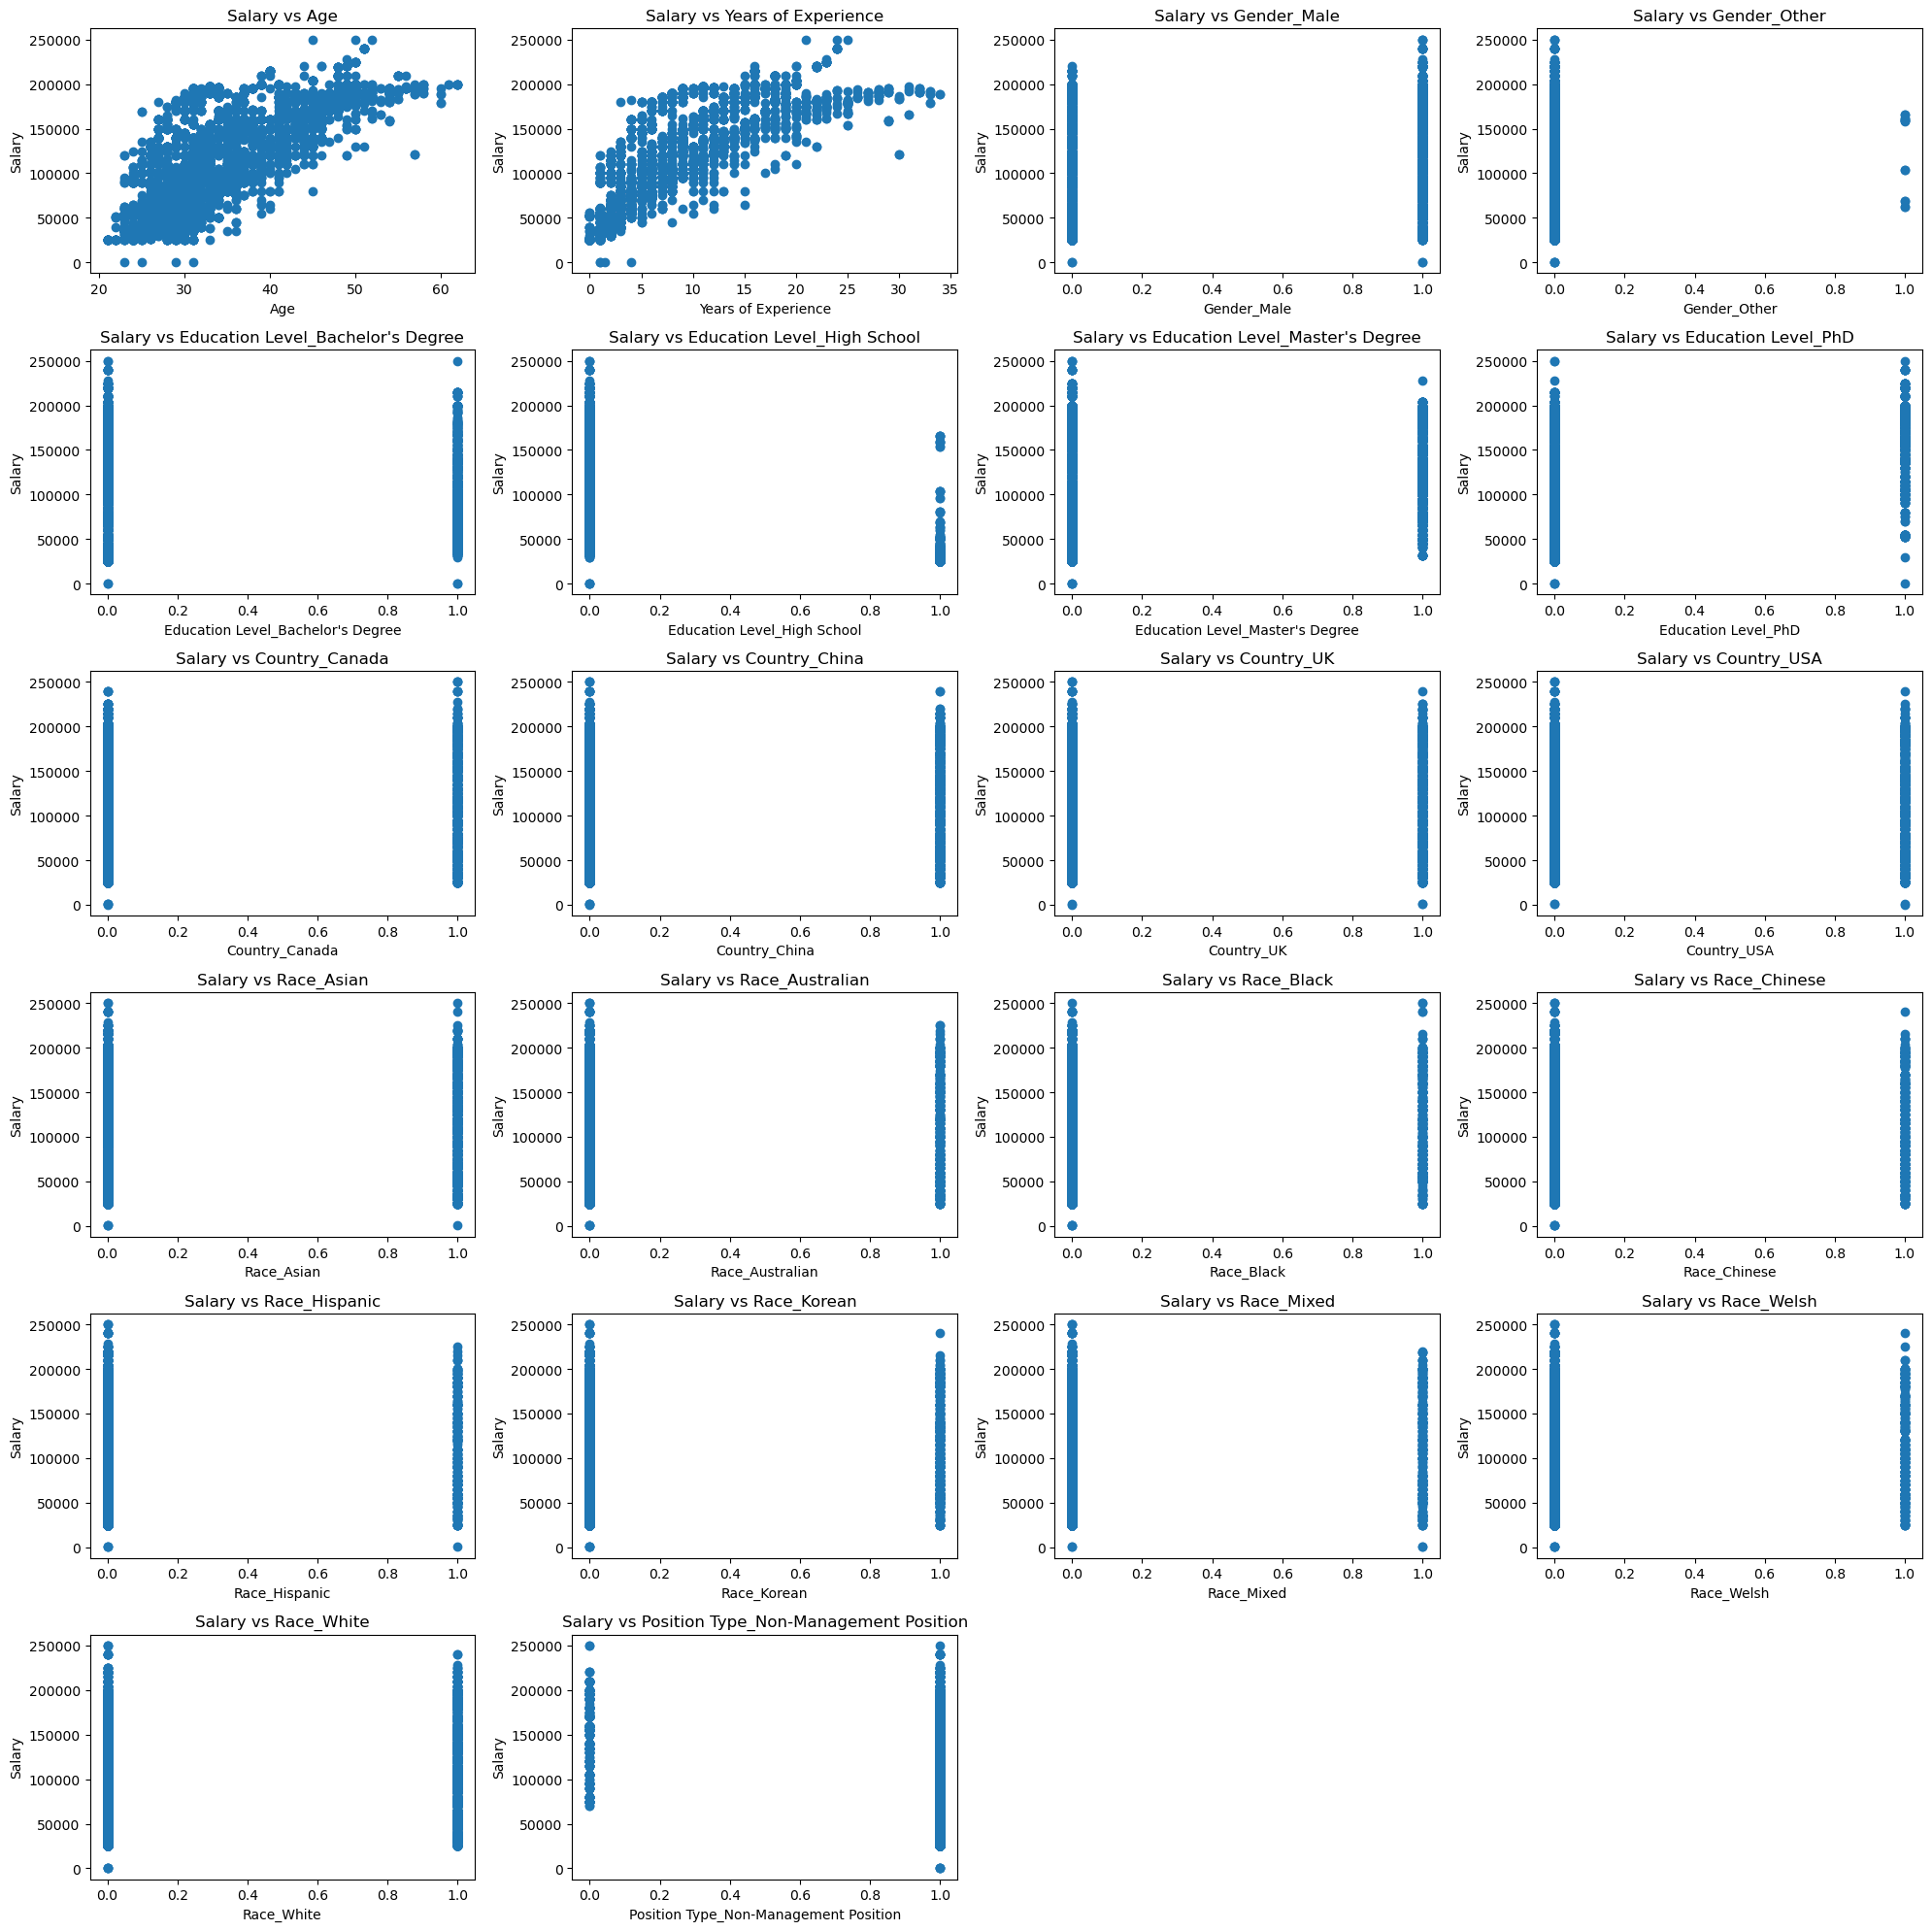

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize a linear regression model
lr = LinearRegression()

# Define the independent and dependent variables
X = df_regression.drop(columns='Salary')
y = df_regression['Salary']

# Fit the model
lr.fit(X, y)

# Calculate the predicted values and residuals
y_pred = lr.predict(X)
residuals = y - y_pred

# Plot the relationships between the dependent variable and each independent variable
plt.figure(figsize=(20, 20))

for i, col in enumerate(X.columns):
    plt.subplot(6, 4, i+1)
    plt.scatter(X[col], y)
    plt.title(f'Salary vs {col}')
    plt.xlabel(col)
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()




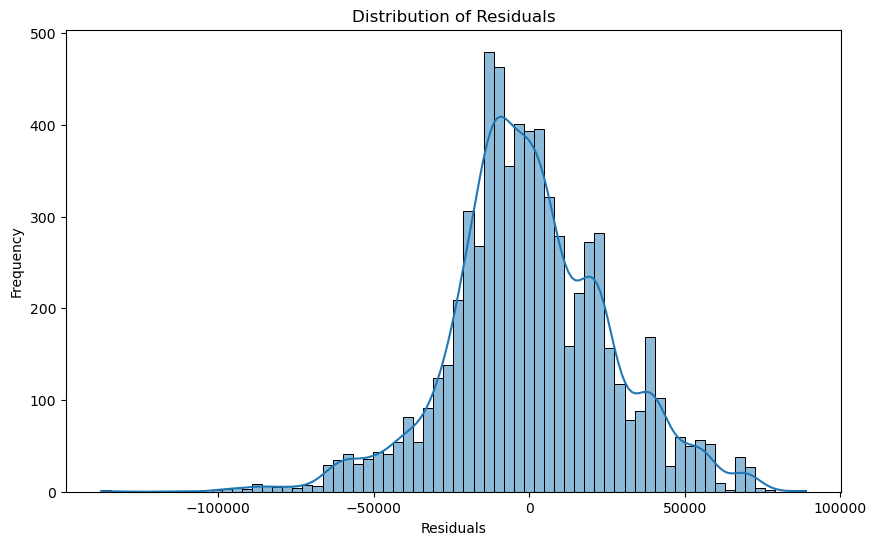

In [17]:
# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


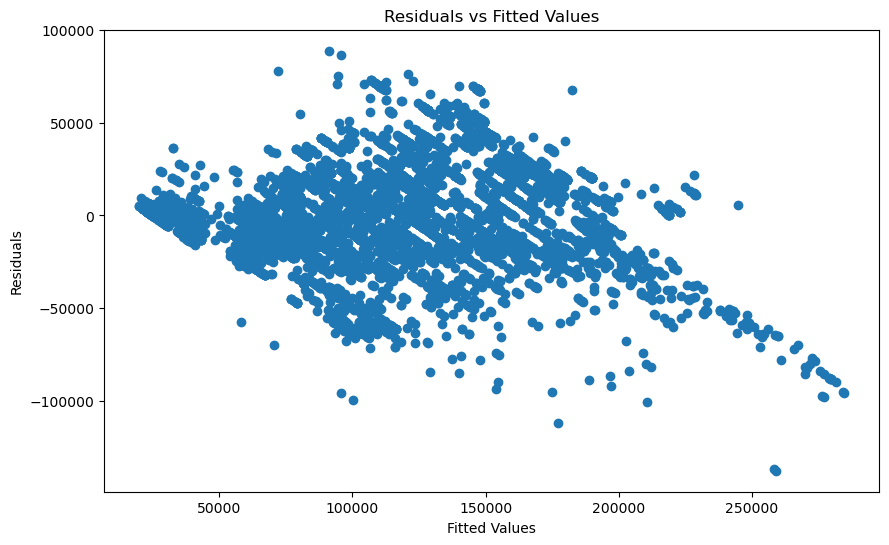

In [18]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


**Linearity:** The scatter plots show the relationship between the dependent variable ('Salary') and each independent variable. While it's difficult to confirm the assumption of linearity due to the nature of binary variables, no obvious non-linear relationships are apparent.

**Homoscedasticity:** The plot of residuals versus fitted values should ideally look like a random scatter (no clear patterns). The plot here does show some pattern, suggesting potential heteroscedasticity (non-constant variance of residuals).

**Normality:** The histogram of residuals should ideally resemble a normal distribution. The plot here suggests that the residuals might be slightly right-skewed, which could potentially violate the assumption of normally distributed residuals.

These observations suggest that some assumptions of linear regression might not be completely met. In such cases, the results of the regression should be interpreted with caution.

In [19]:
import statsmodels.api as sm

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Get the summary of the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     960.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:47:09   Log-Likelihood:                -77570.
No. Observations:                6699   AIC:                         1.552e+05
Df Residuals:                    6676   BIC:                         1.553e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  1.313e+05   3751.604     35.010      0.000    1.24e+05    1.39e+05
Age                                   -1703.3406    123.122    -13.835      0.000   -1944.698   -1461.983
Years of Experience                    7675.9358    156.910     48.919      0.000    7368.342    7983.529
Gender_Male                            5698.8908    654.240      8.711      0.000    4416.372    6981.410
Gender_Other                          -5083.4121   7097.800     -0.716      0.474    -1.9e+04    8830.544
Education Level_Bachelor's Degree     -3.741e+04   1091.587    -34.270      0.000   -3.95e+04   -3.53e+04
Education Level_High School           -6.412e+04   1590.633    -40.308      0.000   -6.72e+04    -6.1e+04
Education Level_Master's Degree       -1.618e+04   1165.983    -13.879      0.000   -1.85e+04   -1.39e+04
Education Level_PhD                   -4622.6409   1330.739     -3.474      0.001   -7231.315   -2013.967
Country_Canada                          -79.7452   1231.464     -0.065      0.948   -2493.808    2334.317
Country_China                          -707.3795   1591.336     -0.445      0.657   -3826.906    2412.147
Country_UK                            -1201.9880   1328.755     -0.905      0.366   -3806.772    1402.796
Country_USA                            -469.3371   1321.336     -0.355      0.722   -3059.578    2120.904
Race_Asian                              916.0494   1762.401      0.520      0.603   -2538.819    4370.917
Race_Australian                        1011.2893   2264.780      0.447      0.655   -3428.402    5450.981
Race_Black                              294.9119   2275.713      0.130      0.897   -4166.213    4756.037
Race_Chinese                           -650.3120   2476.226     -0.263      0.793   -5504.506    4203.882
Race_Hispanic                          -983.3067   1996.144     -0.493      0.622   -4896.386    2929.773
Race_Korean                            1122.5059   2468.387      0.455      0.649   -3716.322    5961.334
Race_Mixed                             2203.2546   2428.883      0.907      0.364   -2558.133    6964.642
Race_Welsh                            -1800.3962   2430.881     -0.741      0.459   -6565.699    2964.907
Race_White                             1013.5458   1758.297      0.576      0.564   -2433.277    4460.369
Position Type_Non-Management Position -1866.5212   1329.014     -1.404      0.160   -4471.813     738.770
==============================================================================
Omnibus:                      126.764   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.043
Skew:                          -0.068   Prob(JB):                     2.52e-56
Kurtosis:  

**Here are the results of the multiple linear regression analysis:**

* The R-squared value is 0.760, which means that approximately 76% of the variability in the dependent variable, Salary, can be explained by the independent variables in our model.

Looking at the coefficients, we can interpret them as follows:

* **Gender:** The coefficient for Gender_Male is positive and statistically significant (p < 0.05), indicating that, all other things being equal, being male is associated with an increase in salary of approximately $5698.89 compared to being female. However, keep in mind this is an average effect and the actual effect can vary.

* **Age:** The coefficient for Age is negative and statistically significant (p < 0.05), suggesting that with each additional year of age, the salary decreases by approximately $1703.34, all other things being equal. This might be counter-intuitive and could be influenced by other factors.

* **Years of Experience:** The coefficient for Years of Experience is positive and statistically significant (p < 0.05), suggesting that with each additional year of experience, the salary increases by approximately $7675.94, all other things being equal.

* **Education Level:** The coefficients for different education levels are negative and statistically significant (p < 0.05), suggesting that compared to the base level (the dropped category), having a Bachelor's, High School, Master's, or PhD degree is associated with a decrease in salary. This could be due to the fact that the base level includes other higher education degrees not specified in the categories.

* **Country and Race:** The coefficients for most countries and races are not statistically significant (p > 0.05), suggesting that these variables may not have a significant impact on salary when controlling for other factors.

* **Position Type:** The coefficient for Non-Management Position is negative but not statistically significant (p > 0.05), suggesting that being in a non-management position does not have a significant impact on salary when controlling for other factors.

Remember, these results should be interpreted with caution, as the assumptions of linear regression may not be fully satisfied

**Non-parametric methods** do not make strong assumptions about the form of the mapping function. Examples include decision trees, random forests, and support vector machines with non-linear kernels. So lets try one of these:

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Drop the constant column added for OLS regression
X = X.drop(columns='const')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Print the feature importances
importances_df


,feature,importance
1,Years of Experience,0.764179
0,Age,0.081382
4,Education Level_Bachelor's Degree,0.043803
6,Education Level_Master's Degree,0.033274
5,Education Level_High School,0.019004
7,Education Level_PhD,0.016910
2,Gender_Male,0.011727
21,Position Type_Non-Management Position,0.006016
12,Race_Asian,0.003205
20,Race_White,0.002794


Here are the feature importances from the Random Forest model:

* **'Years of Experience'** is the most important feature, with a relative importance of approximately 0.76. This means that changes in 'Years of Experience' have the most significant impact on 'Salary' according to this model.
* **'Age'** is the second most important feature, with a relative importance of approximately 0.08.
* **Education levels** ('Bachelor's Degree', 'Master's Degree', 'High School', and 'PhD') are also important features, with relative importances ranging from approximately 0.02 to 0.04.
* **'Gender_Male'** has a relative importance of approximately 0.01, which suggests that it has some influence on 'Salary', but less than 'Years of Experience', 'Age', and 'Education Level'.
* **The other** features have relatively low importances, suggesting that they have less influence on 'Salary' according to this model.

Please note that these feature importances are "relative" and sum up to 1. They represent the relative impact of each feature on the variation in 'Salary'. However, they do not directly tell us how much 'Salary' will change if these features change.

# Comparing Models

In [21]:
# Predict the target variable for the test set using the linear regression model
y_pred_lr = results.predict(sm.add_constant(X_test))

# Calculate the RMSE for the linear regression model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Predict the target variable for the test set using the random forest model
y_pred_rf = rf.predict(X_test)

# Calculate the RMSE for the random forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rmse_lr, rmse_rf


(25774.617137699363, 13920.0850884661)

The root mean square error (RMSE) for the linear regression model is approximately 25774.62, while the RMSE for the random forest model is significantly lower at approximately 13920.09.

This suggests that the random forest model has better predictive performance than the linear regression model for this dataset, according to the RMSE metric. It's worth noting that this could be due to the random forest model's ability to capture complex non-linear relationships and interactions between features, which the linear regression model might not fully capture.

**Lets rank the feature impact for both models:**

In [22]:
# Linear Regression Feature Importance (Absolute Coefficients)
lr_importances_df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(results.params[1:])})
lr_importances_df = lr_importances_df.sort_values('importance', ascending=False)

# Print the feature importances for both models
lr_importances_df, importances_df


(                                                                     feature  \
 Education Level_High School                      Education Level_High School   
 Education Level_Bachelor's Degree          Education Level_Bachelor's Degree   
 Education Level_Master's Degree              Education Level_Master's Degree   
 Years of Experience                                      Years of Experience   
 Gender_Male                                                      Gender_Male   
 Gender_Other                                                    Gender_Other   
 Education Level_PhD                                      Education Level_PhD   
 Race_Mixed                                                        Race_Mixed   
 Position Type_Non-Management Position  Position Type_Non-Management Position   
 Race_Welsh                                                        Race_Welsh   
 Age                                                                      Age   
 Country_UK                 

**Linear Regression:**

The most impactful features are 'Education Level_High School', 'Education Level_Bachelor's Degree', 'Education Level_Master's Degree', 'Years of Experience', and 'Gender_Male'. The impact is determined by the absolute value of the coefficient, which represents the change in the 'Salary' associated with a one-unit change in that feature, assuming all other features are held constant.


**Random Forest:**

The most impactful features are 'Years of Experience', 'Age', 'Education Level_Bachelor's Degree', 'Education Level_Master's Degree', and 'Education Level_High School'. The impact is determined by the feature importance, which represents the relative impact of each feature on the variation in 'Salary'.
